Regression part a:
In this section, you are to solve a relevant regression problem
for your data and statistically evaluate the result. We will begin by examining the
most elementary model, namely linear regression.

1:

Explain what variable is predicted based on which other variables and what
you hope to accomplish by the regression. Mention your feature transformation
choices such as one-of-K coding. Since we will use regularization momentarily,
apply a feature transformation to your data matrix X such that each column
has mean 0 and standard deviation 1 3 .

Since out desired output variable is a boolean we cant do regression on it so we have therefore picked age instead to try and see if linear regression can estimate the subjects age based on the other variables.

['chd', 'sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age']
Done


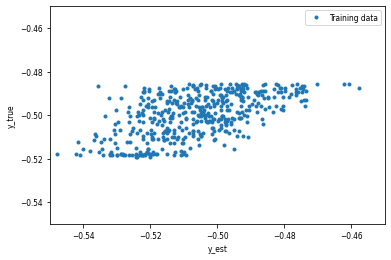

In [51]:
# Read data
import numpy as np
import xlrd
import sys
import matplotlib
matplotlib.rcParams.update({'font.size': 7.5})
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from toolbox_02450 import rlr_validate
# np.set_printoptions(threshold=sys.maxsize)

"""
Explanation of variables in dataset SAHD.xls (african heart disease)
chd: Coronary heart disease (bool (Actually its a string but its only used in the dictionary and as whether or not the subject has the disease)) 
sbp: Systolic blood pressure (int)
tobacco: tobacco in kg (float)
ldl: ? (float)
adiposity: ? (float)
famhist: Family history of CHD (bool (Present, Absent)) (string)
typea: ? (int)
obesity: ? (float)
alcohol: alcohol consumption in liters (float)
age: age (int)
"""

# Load xls sheet with data
doc = xlrd.open_workbook('Data/SAHD2.xls').sheet_by_index(0)

# Extract attribute names (1st row, column 4 to 12)
attributeNames = doc.row_values(0, 0, 10)
print(attributeNames)

# Extract class names to python list,
# then encode with integers (dict)
classLabels = doc.col_values(0, 1, 463)
classNames = sorted(set(classLabels))
classDict = dict(zip(classNames, range(2)))

# Extract vector y, convert to NumPy array
y = np.asarray([classDict[value] for value in classLabels])

# Preallocate memory, then extract excel data to matrix X
X = np.empty((462, 9))
for i, col_id in enumerate(range(1,10)):
    X[:, i] = np.asarray(doc.col_values(col_id, 1, 463))
# Compute values of N, M and C.
N = len(y)
M = len(attributeNames)
C = len(classNames)

#print(X)

print('Done')

Y2 = X - np.ones((N, 1))*X.mean(0)
X = (Y2*(1/np.std(Y2,0)))

X_without_age = np.delete(X,8,axis=1)

# print(Y2_without_age)
# print(Y2)
eps_mean, eps_std = 0, 0.1
eps = np.array(eps_std*np.random.randn(N) + eps_mean).reshape(-1,1)
w0 = -0.5
w1 = 0.01
y = w0 + w1*X[:,[8]] + eps
y_true = y - eps

# Fit ordinary least squares regression model
model = lm.LinearRegression(fit_intercept=True)
model = model.fit(X,y)
# Compute model output:
y_est = model.predict(X)
# Or equivalently:
#y_est = model.intercept_ + X @ model.coef_

# Plot original data and the model output
f = plt.figure()

plt.plot(y_est,y_true,'.')
plt.xlim([-0.55, -0.45])
plt.ylim([-0.55, -0.45])

plt.xlabel('y_est'); plt.ylabel('y_true')
plt.legend(['Training data', 'Data generator', 'Regression fit (model)'])


### Implementer ting fra ex8. 

plt.show()


2:

Introduce a regularization parameter λ as discussed in chapter 14 of the lecture
notes, and estimate the generalization error for different values of λ. Specifi-
cally, choose a reasonable range of values of λ (ideally one where the general-
ization error first drop and then increases), and for each value use K = 10 fold
cross-validation (algorithm 5) to estimate the generalization error.
Include a figure of the estimated generalization error as a function of λ in the
report and briefly discuss the result.

462 8
N: 415 M: 8
N: 415 M: 8
N: 416 M: 8
N: 416 M: 8
N: 416 M: 8
N: 416 M: 8
N: 416 M: 8
N: 416 M: 8
N: 416 M: 8
N: 416 M: 8


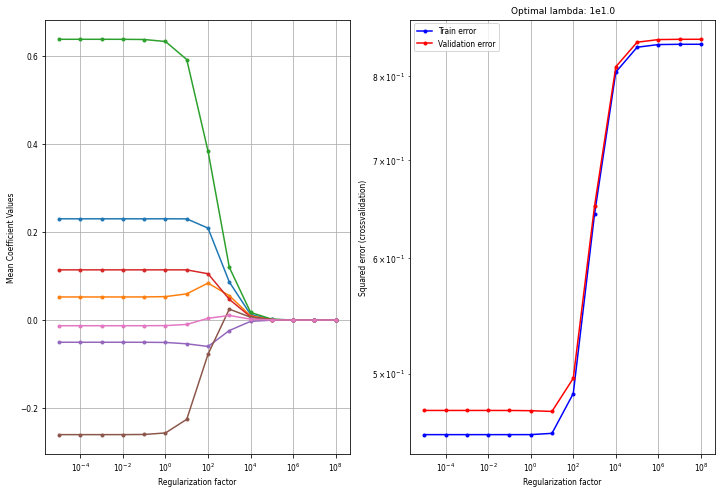

Linear regression without feature selection:
- Training error: 0.454257931209123
- Test error:     0.4741292700220841
- R^2 train:     0.545599532762653
- R^2 test:     0.5137176140364939

Regularized linear regression:
- Training error: 0.4549180746922052
- Test error:     0.47498902694839434
- R^2 train:     0.5449391821412389
- R^2 test:     0.5128358193954345

Weights in last fold:
            chd            0.17
            sbp            0.23
        tobacco            0.06
            ldl             0.6
      adiposity            0.11
        famhist           -0.05
          typea           -0.23
        obesity           -0.01
Ran Exercise 8.1.1


In [52]:

# exercise 8.1.1

from matplotlib.pylab import (figure, semilogx, loglog, xlabel, ylabel, legend, 
                           title, subplot, show, grid)
import numpy as np
from scipy.io import loadmat
import sklearn.linear_model as lm
from sklearn import model_selection
from toolbox_02450 import rlr_validate

attributeNames = ['chd', 'sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age']

X_only_age = X[:,[8]].squeeze()

N, M = X_without_age.shape
print(N,M)

# Add offset attribute
#X = np.concatenate((np.ones((X.shape[0],1)),X),1)
#attributeNames = [u'Offset']+attributeNames
#M = M+1

## Crossvalidation
# Create crossvalidation partition for evaluation
K = 10
CV = model_selection.KFold(K, shuffle=True)
#CV = model_selection.KFold(K, shuffle=False)

# Values of lambda
lambdas = np.power(10.,range(-5,9))

# Initialize variables
#T = len(lambdas)
Error_train = np.empty((K,1))
Error_test = np.empty((K,1))
Error_train_rlr = np.empty((K,1))
Error_test_rlr = np.empty((K,1))
Error_train_nofeatures = np.empty((K,1))
Error_test_nofeatures = np.empty((K,1))
w_rlr = np.empty((M,K))
mu = np.empty((K, M-1))
sigma = np.empty((K, M-1))
w_noreg = np.empty((M,K))

k=0
for train_index, test_index in CV.split(X_without_age, X_only_age):
    
    # extract training and test set for current CV fold
    X_train = X_without_age[train_index]
    y_train = X_only_age[train_index]
    X_test = X_without_age[test_index]
    y_test = X_only_age[test_index]

    
    N, M = X_train.shape
    print(f'N: {N} M: {M}')

    internal_cross_validation = 10    
    
    opt_val_err, opt_lambda, mean_w_vs_lambda, train_err_vs_lambda, test_err_vs_lambda = rlr_validate(X_train, y_train, lambdas, internal_cross_validation)

    # Standardize outer fold based on training set, and save the mean and standard
    # deviations since they're part of the model (they would be needed for
    # making new predictions) - for brevity we won't always store these in the scripts
    mu[k, :] = np.mean(X_train[:, 1:], 0)
    sigma[k, :] = np.std(X_train[:, 1:], 0)
    
    X_train[:, 1:] = (X_train[:, 1:] - mu[k, :] ) / sigma[k, :] 
    X_test[:, 1:] = (X_test[:, 1:] - mu[k, :] ) / sigma[k, :] 
    
    Xty = X_train.T @ y_train
    XtX = X_train.T @ X_train
    
    # Compute mean squared error without using the input data at all
    Error_train_nofeatures[k] = np.square(y_train-y_train.mean()).sum(axis=0)/y_train.shape[0]
    Error_test_nofeatures[k] = np.square(y_test-y_test.mean()).sum(axis=0)/y_test.shape[0]

    # Estimate weights for the optimal value of lambda, on entire training set
    lambdaI = opt_lambda * np.eye(M)
    lambdaI[0,0] = 0 # Do no regularize the bias term
    w_rlr[:,k] = np.linalg.solve(XtX+lambdaI,Xty).squeeze()
    # Compute mean squared error with regularization with optimal lambda
    Error_train_rlr[k] = np.square(y_train-X_train @ w_rlr[:,k]).sum(axis=0)/y_train.shape[0]
    Error_test_rlr[k] = np.square(y_test-X_test @ w_rlr[:,k]).sum(axis=0)/y_test.shape[0]

    # Estimate weights for unregularized linear regression, on entire training set
    w_noreg[:,k] = np.linalg.solve(XtX,Xty).squeeze()
    # Compute mean squared error without regularization
    Error_train[k] = np.square(y_train-X_train @ w_noreg[:,k]).sum(axis=0)/y_train.shape[0]
    Error_test[k] = np.square(y_test-X_test @ w_noreg[:,k]).sum(axis=0)/y_test.shape[0]
    # OR ALTERNATIVELY: you can use sklearn.linear_model module for linear regression:
    #m = lm.LinearRegression().fit(X_train, y_train)
    #Error_train[k] = np.square(y_train-m.predict(X_train)).sum()/y_train.shape[0]
    #Error_test[k] = np.square(y_test-m.predict(X_test)).sum()/y_test.shape[0]

    # Display the results for the last cross-validation fold
    if k == K-1:
        figure(k, figsize=(12,8))
        subplot(1,2,1)
        semilogx(lambdas,mean_w_vs_lambda.T[:,1:],'.-') # Don't plot the bias term
        xlabel('Regularization factor')
        ylabel('Mean Coefficient Values')
        grid()
        # You can choose to display the legend, but it's omitted for a cleaner 
        # plot, since there are many attributes
        #legend(attributeNames[1:], loc='best')
        
        subplot(1,2,2)
        title('Optimal lambda: 1e{0}'.format(np.log10(opt_lambda)))
        loglog(lambdas,train_err_vs_lambda.T,'b.-',lambdas,test_err_vs_lambda.T,'r.-')
        xlabel('Regularization factor')
        ylabel('Squared error (crossvalidation)')
        legend(['Train error','Validation error'])
        grid()
    
    # To inspect the used indices, use these print statements
    #print('Cross validation fold {0}/{1}:'.format(k+1,K))
    #print('Train indices: {0}'.format(train_index))
    #print('Test indices: {0}\n'.format(test_index))

    k+=1

show()
# Display results
print('Linear regression without feature selection:')
print('- Training error: {0}'.format(Error_train.mean()))
print('- Test error:     {0}'.format(Error_test.mean()))
print('- R^2 train:     {0}'.format((Error_train_nofeatures.sum()-Error_train.sum())/Error_train_nofeatures.sum()))
print('- R^2 test:     {0}\n'.format((Error_test_nofeatures.sum()-Error_test.sum())/Error_test_nofeatures.sum()))
print('Regularized linear regression:')
print('- Training error: {0}'.format(Error_train_rlr.mean()))
print('- Test error:     {0}'.format(Error_test_rlr.mean()))
print('- R^2 train:     {0}'.format((Error_train_nofeatures.sum()-Error_train_rlr.sum())/Error_train_nofeatures.sum()))
print('- R^2 test:     {0}\n'.format((Error_test_nofeatures.sum()-Error_test_rlr.sum())/Error_test_nofeatures.sum()))

print('Weights in last fold:')
for m in range(M):
    print('{:>15} {:>15}'.format(attributeNames[m], np.round(w_rlr[m,-1],2)))

print('Ran Exercise 8.1.1')



#Q3: Jeg forstår ikke spørgsmålet..
3:

Explain how a new data observation is predicted according to the linear model
with the lowest generalization error as estimated in the previous question. I.e.,
what are the effects of the selected attributes in terms of determining the
predicted class. Does the result make sense?



Regression part b:
In this section, we will compare three models: the regularized
linear regression model from the previous section, an artificial neural network (ANN)
and a baseline. We are interested in two questions: Is one model better than the
other? Is either model better than a trivial baseline?. We will attempt to answer
these questions with two-level cross-validation.

1:

Implement two-level cross-validation (see algorithm 6 of the lecture notes). We
will use 2-level cross-validation to compare the models with K 1 = K 2 = 10 
folds. As a baseline model, we will apply a linear regression model with no
features, i.e. it computes the mean of y on the training data, and use this value
to predict y on the test data.
Make sure you can fit an ANN model to the data. As complexity-controlling
parameter for the ANN, we will use the number of hidden units 5 h. Based on
a few test-runs, select a reasonable range of values for h (which should include
h = 1), and describe the range of values you will use for h and λ.


In [87]:
print("foo")
from matplotlib.pyplot import figure, plot, subplot, title, xlabel, ylabel, show, clim
from scipy.io import loadmat
import sklearn.linear_model as lm
from sklearn import model_selection
from toolbox_02450 import feature_selector_lr, bmplot, train_neural_net, rlr_validate
import numpy as np
import pandas as pd
import torch

# Load data from matlab file
X = X_without_age
y = X_only_age
# attributeNames = [name[0] for name in mat_data['attributeNames'][0]]
# N, M = X.shape

## Crossvalidation
# Create crossvalidation partition for evaluation
K = 10 #Folds of cross validation
S = 3  #Number of different models to crossvalidate
CV = model_selection.KFold(n_splits=K,shuffle=True)


#ANN model:
# n_hidden_units = 3 

h_values = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


# m2 = lambda: torch.nn.Sequential(
#                 torch.nn.Linear(M, n_hidden_units), #M features to H hiden units
#                 # 1st transfer function, either Tanh or ReLU:
#                 torch.nn.ReLU(),                            #torch.nn.ReLU(),
#                 torch.nn.Linear(n_hidden_units, 1), # H hidden units to 1 output neuron
#                 torch.nn.ReLU() # final tranfer function
#                 )
loss_fn = torch.nn.MSELoss()
max_iter = 10000
# print('Training model of type:\n{}\n'.format(str(m2())))

# Initialize variables
Features = np.zeros((M,K))
m1_Error_train = np.empty((K,1))
m1_Error_test = np.empty((K,1))

m3_Error_train = np.empty((K,1))
m3_Error_test = np.empty((K,1))

m4_w_rlr = np.empty((M,K))
m4_Error_train_rlr = np.empty((K,1))
m4_Error_test_rlr = np.empty((K,1))
m4_optimal_lambda = np.empty((K,1))

m2_errors = np.empty((K,1))
m2_optimal_h = np.empty((K,1))

Error_train_fs = np.empty((K,1))
Error_test_fs = np.empty((K,1))
Error_train_nofeatures = np.empty((K,1))
Error_test_nofeatures = np.empty((K,1))


k = 0
for train_index, test_index in CV.split(X):

    # extract training and test set for current CV fold
    X_train = X[train_index,:]
    y_train = y[train_index]
    X_test = X[test_index,:]
    y_test = y[test_index]

    # Extract training and test set for current CV fold, 
    # and convert them to PyTorch tensors
    X_train_torch = torch.Tensor(X[train_index,:])
    y_train_torch = torch.Tensor(y[train_index]).unsqueeze(1)
    X_test_torch = torch.Tensor(X[test_index,:])
    y_test_torch = torch.Tensor(y[test_index]).unsqueeze(1)
    
    # Go to the file 'toolbox_02450.py' in the Tools sub-folder of the toolbox
    # and see how the network is trained (search for 'def train_neural_net',
    # which is the place the function below is defined)

    #Model 2: (ANN)

    temp_m2_errors = np.empty((len(h_values),1))
    print(len(h_values))
    nr = 0
    for j in h_values:


        m2 = lambda: torch.nn.Sequential(
                    torch.nn.Linear(M, j), #M features to H hiden units
                    # 1st transfer function, either Tanh or ReLU:
                    torch.nn.Tanh(),                            #torch.nn.ReLU(),
                    torch.nn.Linear(j, 1), # H hidden units to 1 output neuron
                    torch.nn.ReLU() # final tranfer function
                    )

        # print('Training model of type:\n{}\n'.format(str(m2())))

        m2_net, m2_final_loss, m2_learning_curve = train_neural_net(m2,
                                                        loss_fn,
                                                        X=X_train_torch,
                                                        y=y_train_torch,
                                                        n_replicates=3,
                                                        max_iter=max_iter)

        temp_m2_errors[nr] = m2_final_loss

        nr += 1
    
    minimum_m2_loss_index = np.argmin(temp_m2_errors)
    minimum_m2_loss = temp_m2_errors[minimum_m2_loss_index]

    m2_errors[k] = minimum_m2_loss
    m2_optimal_h[k] = minimum_m2_loss_index
    
    #model 3: (Baseline)
    m3_mean_y = np.mean(y_train)
    m3_Error_train[k] = y_train[k] - m3_mean_y 
    m3_Error_test[k] = y_test[k] - m3_mean_y

    m4_internal_cross_validation = 10  
    # Values of lambda
    m4_lambdas = np.power(10.,range(-5,9))
    m4_opt_val_err, m4_opt_lambda, m4_mean_w_vs_lambda, m4_train_err_vs_lambda, m4_test_err_vs_lambda = rlr_validate(X_train, y_train, m4_lambdas, m4_internal_cross_validation)

    m4_Xty = X_train.T @ y_train
    m4_XtX = X_train.T @ X_train

    m4_lambdaI = m4_opt_lambda * np.eye(M)
    m4_lambdaI[0,0] = 0 # Do no regularize the bias term
    m4_w_rlr[:,k] = np.linalg.solve(m4_XtX+m4_lambdaI,m4_Xty).squeeze()

    m4_optimal_lambda[k] = m4_opt_lambda
    m4_Error_train_rlr[k] = np.square(y_train-X_train @ m4_w_rlr[:,k]).sum(axis=0)/y_train.shape[0]
    m4_Error_test_rlr[k] = np.square(y_test-X_test @ m4_w_rlr[:,k]).sum(axis=0)/y_test.shape[0]

    print('Cross validation fold {0}/{1}'.format(k+1,K))
    # print('Train indices: {0}'.format(train_index))
    # print('Test indices: {0}'.format(test_index))

    print(f"{m2_optimal_h} m2 (neural network) optimal h value")
    print(f'{m2_final_loss} m2 (neural network) error')

    #print(f'{m3_Error_train[k]} m3 (baseline) training error')
    print(f'{m3_Error_test[k]} m3 (baseline) test error')

    #print(f'{m4_Error_train_rlr[k]} m4 (rlr_validate) training error')
    print(f"{m4_opt_lambda} m4 (rlr_validate) optimal lambda value")
    print(f'{m4_Error_test_rlr[k]} m4 (rlr_validate) test error')


    k+=1

    ### Skal man bruge rlr_validate eller skal man lave linear regression 
    ### og så selv sætte lamdas ind så man kan lave et plot over lambda 
    ### værdierne og deres tilhørende test og training error? 

foo
10

	Replicate: 1/3
		Iter	Loss			Rel. loss
		1000	0.9088653	7.285561e-05
		2000	0.8203442	6.175556e-05
		3000	0.76852614	2.8307533e-05
		4000	0.7615234	6.8877366e-06
		Final loss:
		4161	0.7606279	5.4853666e-07

	Replicate: 2/3
		Iter	Loss			Rel. loss
		1000	0.7647984	2.4159299e-05
		Final loss:
		1667	0.75799334	1.5726955e-07

	Replicate: 3/3
		Iter	Loss			Rel. loss
		1000	0.7830797	0.000112942915
		2000	0.7649486	6.467302e-06
		Final loss:
		2270	0.7640667	9.36116e-07

	Replicate: 1/3
		Iter	Loss			Rel. loss
		1000	0.76127744	2.4975661e-05
		Final loss:
		1712	0.75114274	6.3481525e-07

	Replicate: 2/3
		Iter	Loss			Rel. loss
		1000	0.7707887	2.4048872e-05
		Final loss:
		1550	0.7640403	5.4608677e-07

	Replicate: 3/3
		Iter	Loss			Rel. loss
		1000	0.7720637	2.9335793e-05
		2000	0.7584346	1.1159519e-05
		Final loss:
		2738	0.75024945	3.1778563e-07

	Replicate: 1/3
		Iter	Loss			Rel. loss
		1000	0.7504248	2.4145489e-05
		Final loss:
		1434	0.7458458	8.7906983e-07

	Replicate: 2/3
	

2: 

Produce a table akin to Table 1 using two-level cross-validation (algorithm 6
in the lecture notes). The table shows, for each of the K 1 = 10 folds i, the
optimal value of the number of hidden units and regularization strength (h ∗ i
and λ ∗ i respectively) as found after each inner loop, as well as the estimated
generalization errors E i test by evaluating on D i test . It also includes the baseline
test error, also evaluated on D i test . Importantly, you must re-use the train/test
splits D i par , D i test for all three methods to allow statistical comparison (see next
section).
Note the error measure we use is the squared loss per observation, i.e. we divide
by the number of observation in the test dataset:

$$

E = \frac{1}{N^{test}}\,\sum_{i=1}^{N^{test}}(y_i - ŷ_i)^2

$$




Include a table similar to Table 1 in your report and briefly discuss what it tells
you at a glance. Do you find the same value of λ ∗ as in the previous section?

In [89]:
# Turn data into pandas dataframe so that i can display it:
pd.options.display.float_format = '{:,.2f}'.format
data = {"Outer fold":[i for i in range(K)],
        "ANN_h":m2_optimal_h.squeeze(),
        "ANN_E":m2_errors.squeeze(),
        "LR_lamda":m4_optimal_lambda.squeeze(),
        "LR_E":m4_Error_test_rlr.squeeze(),
        "BaseLine_E":m3_Error_test.squeeze()}

df = pd.DataFrame(data)

print(df)
print("\n")
print("ANN = artificial neuralnet (h = hiddenlayer, E = error)")
print("LR = linear regression (lamda = optimal lambda number, E = error)")
print("Baseline_E is just the error of the test set mean")

   Outer fold  ANN_h  ANN_E  LR_lamda  LR_E  BaseLine_E
0           0   9.00   0.70     10.00  0.40        1.06
1           1   7.00   0.67     10.00  0.61       -1.91
2           2   8.00   0.69     10.00  0.36       -0.19
3           3   9.00   0.65      1.00  0.89        0.07
4           4   9.00   0.66     10.00  0.32       -0.70
5           5   9.00   0.68     10.00  0.43       -0.24
6           6   6.00   0.67     10.00  0.36       -0.97
7           7   9.00   0.68     10.00  0.58        1.33
8           8   9.00   0.70     10.00  0.43        0.90
9           9   7.00   0.70     10.00  0.36       -1.75


ANN = artificial neuralnet (h = hiddenlayer, E = error)
LR = linear regression (lamda = optimal lambda number, E = error)
Baseline_E is just the error of the test set mean


3: 

Statistically evaluate if there is a significant performance difference between the
fitted ANN, linear regression model and baseline using the methods described
in chapter 11. These comparisons will be made pairwise (ANN vs. linear
regression; ANN vs. baseline; linear regression vs. baseline). We will allow
some freedom in what test to choose. Therefore, choose either:
setup I (section 11.3): Use the paired t-test described in Box 11.3.4
setup II (section 11.4): Use the method described in Box 11.4.1)
Include p-values and confidence intervals for the three pairwise tests in your
report and conclude on the results: Is one model better than the other? Are
the two models better than the baseline? Are some of the models identical?
What recommendations would you make based on what you’ve learned?

Part classification: 

In this part of the report you are to solve a relevant classification
problem for your data and statistically evaluate your result. The tasks will closely
mirror what you just did in the last section. The three methods we will compare is a
baseline, logistic regression, and one of the other four methods from below (referred
to as method 2 ).
Logistic regression for classification. Once more, we can use a regularization pa-
rameter λ ≥ 0 to control complexity
ANN Artificial neural networks for classification. Same complexity-controlling pa-
rameter as in the previous exercise
CT Classification trees. Same complexity-controlling parameter as for regression
trees
KNN k-nearest neighbor classification, complexity controlling parameter k = 1, 2 . . .
NB Naı̈ve Bayes. As complexity-controlling parameter, we suggest the term b ≥ 0
+
from section 11.2.1 of the lecture notes to estimate 6 $ p(x = 1) = \frac{n^+ + b}{n^+ + n^- +2b} $


1:

Explain which classification problem you have chosen to solve. Is it a multi-
class or binary classification problem?

2:

We will compare logistic regression 7 , method 2 and a baseline. For logistic
regression, we will once more use λ as a complexity-controlling parameter, and
for method 2 a relevant complexity controlling parameter and range of values.
We recommend this choice is made based on a trial run, which you do not need
to report. Describe which parameter you have chosen and the possible values
of the parameters you will examine.
The baseline will be a model which compute the largest class on the training
data, and predict everything in the test-data as belonging to that class (corre-
sponding to the optimal prediction by a logistic regression model with a bias
term and no features).

3:

Again use two-level cross-validation to create a table similar to Table 2, but
now comparing the logistic regression, method 2, and baseline. The table should
once more include the selected parameters, and as an error measure we will use
the error rate:
$ E = \frac{Number of misclassified observations}{N^{test}} $
Once more, make sure to re-use the outer validation splits to admit statistical
evaluation. Briefly discuss the result.

4:

Perform a statistical evaluation of your three models similar to the previous
section. That is, compare the three models pairwise. We will once more allow
some freedom in what test to choose. Therefore, choose either:

setup I (section 11.3): Use McNemera’s test described in Box 11.3.2)

setup II (section 11.4): Use the method described in Box 11.4.1)

Include p-values and confidence intervals for the three pairwise tests in your
report and conclude on the results: Is one model better than the other? Are
the two models better than the baseline? Are some of the models identical?
What recommendations would you make based on what you’ve learned?

5:

Train a logistic regression model using a suitable value of λ (see previous ex-
ercise). Explain how the logistic regression model make a prediction. Are the
same features deemed relevant as for the regression part of the report?